### Name:

### ID:

# Part 1: Neural network for binary classification

<font color='blue'>
This part aims to build a neural network based on batch gradient decent from scratch step by step using Numpy for solving binary classification. The banknote dataset involves predicting whether a given banknote is authentic given a number of measures taken from a photograph. The dataset contains 1,372 rows with 5 numeric variables. It is a classification problem with two classes (binary classification).

 Below provides a list of the five variables in the dataset.

- variance of Wavelet Transformed image (continuous).<br>
- skewness of Wavelet Transformed image (continuous).<br>
- kurtosis of Wavelet Transformed image (continuous).<br>
- entropy of image (continuous).<br>
- class (integer).<br>

</font>

In [94]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error


In [95]:
data=pd.read_csv('BankNote_Authentication.csv')
data = data.sample(frac=1).reset_index(drop=True)
classes = [0,1]
data.head(5)

,variance,skewness,curtosis,entropy,class
0,2.522700,2.2369,2.72360,0.79438,0
1,0.049175,6.1437,1.78280,-0.72113,0
2,-1.394600,2.3134,-0.44499,-1.49050,1
3,3.258500,-4.4614,3.80240,-0.15087,0
4,5.391500,9.9946,-3.80810,-3.36420,0


In [96]:
train_df = data[0:1000].reset_index(drop=True)
test_df = data[1000::].reset_index(drop=True)

In [97]:
train_Y =train_df['class'].reset_index(drop=True)
train_X = train_df.loc[:, train_df.columns != 'class']
test_Y =test_df['class'].reset_index(drop=True)
test_X = test_df.loc[:, test_df.columns != 'class']

from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
train_X=scl.fit_transform(train_X)
test_X=scl.transform(test_X)

In [98]:
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)


(1000, 4)
(1000,)
(372, 4)
(372,)


In [99]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

## derivative of sigmoid function   
def sigmoid_prime(z):
    return z * (1 - z)

def reLu(x):
    return np.maximum(x, 0)

## derivative of reLu
def reLu_prime(z):
    return 1 * (z > 0)


In [100]:
class ANN:
    # n_x is the no. pf feature of X
    # n_h1 is the no. of neurons in the hidden layer
    # n_o is the no. of neurons in the output layer
    def __init__(self, n_x, n_h1, n_o, X, y):
                 
        self.X=X
        self.y=y
        # create and initialize W1 matrix with mean =0 and std=0.5  - use numpy 
        self.W1=np.random.normal(scale=0.5, size=(n_h1, n_x))
        # create and initialize b1 vector with zeros
        self.b1=np.zeros((n_h1,1))
        # create and initialize W2 matrix with mean =0 and std=0.0.3
        self.W2=np.random.normal(scale=0.3, size=(n_o, n_h1))
        self.b2=np.zeros((n_o,1))
        self.a1=[]
        self.a2=[]

    # create and initialize b1 vector with zeros
    def train(self, lr=0.01, epechs=50):
        losses=[]
        for i in range(epechs):
            self.a2=self.farward()
            loss=self.cost(self.a2,self.y)
            losses.append(loss)
            ## compute gradient 
            dW1, db1, dW2, db2=grad(self.W1, self.W2 ,self.z1, self.a1, self.z2, self.a2)
            
            ## update weights and biases
            self.W1=self.W1-lr*dW1
            self.b1=self.b1-lr*db1
            self.W2=self.W2-lr*dW2
            self.b2=self.b2-lr*db2
        plt.plot(list(range(epechs)), losses)
        plt.show()
               
    def farward(self):
        self.z1=self.W1.dot(self.X) + self.b1
        #self.z1=np.matmul(self.W1, self.X) + self.b1

        ## activation function for hidden layer is reLu
        self.a1=reLu(self.z1)
        self.z2=np.dot(self.W2, self.a1) + self.b2
        self.a2=sigmoid(self.z2) 
        return self.a2
    
   ## use mean squared error
    def cost(self, pred_y, y):
        loss= mean_squared_error(pred_y, y.values.reshape(1,-1))
        return loss
    
    def predict(self,X):
        a2=self.farward()
        y_pred = np.hstack(a2 > 0.5)
        return y_pred
        
    
    def acc(self, y_true, y_bar):
        return np.equal(y_true, y_bar).mean()

       
    def main(self):
        self.train()
        accuracy= self.acc(self.y, self.predict(self.a2))
        print("The NN accuracy is ", accuracy)


### Backpropagation
####  implement the following formulas

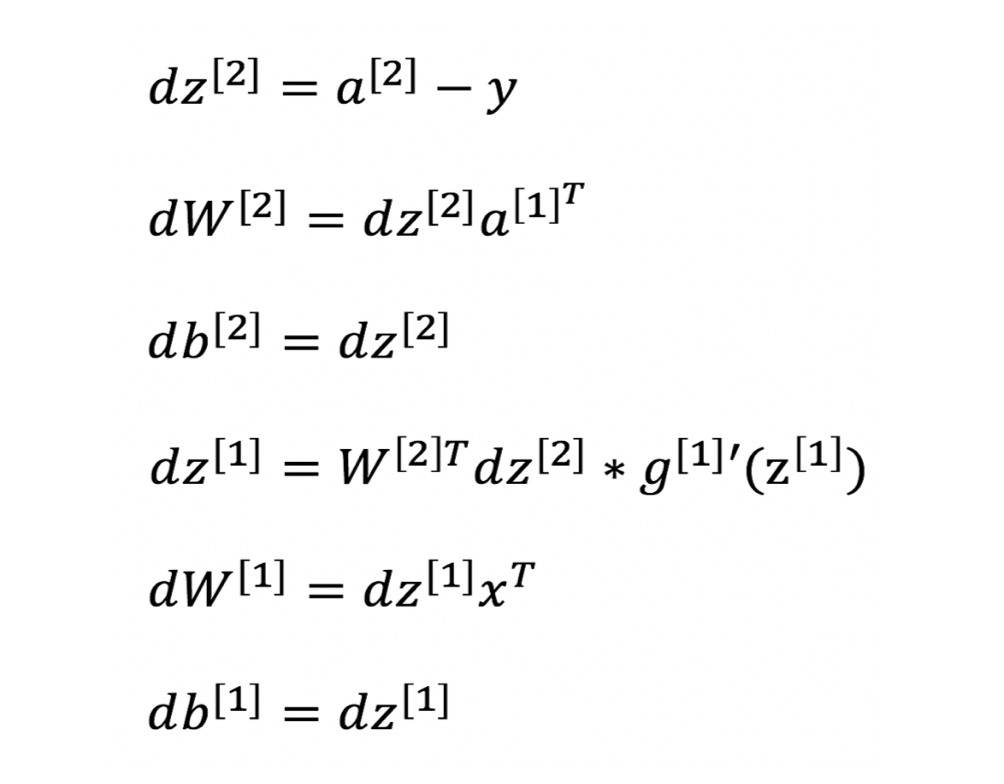

In [101]:
    
    def grad(W1, W2, z1, a1, z2, a2):
        dZ2= a2-train_Y.values.reshape(1,-1)
        dW2 = np.dot(dZ2, a1.T)
        db2 = np.sum(dZ2, axis = 1, keepdims=True)
        dZ1 = np.dot(W2.T, dZ2)* reLu_prime(z1)
        dW1 = np.dot(dZ1, train_X)
        db1 =np.sum(dZ1, axis = 1, keepdims=True)
        return dW1, db1, dW2, db2

C:\Users\DINA\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
C:\Users\DINA\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
C:\Users\DINA\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


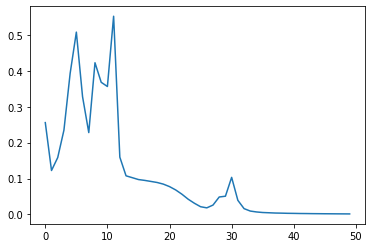

The NN accuracy is  0.998


In [102]:
input_n = train_X.shape[1] 
hidden_nodes = 8
output_n = 1

ann = ANN(input_n,hidden_nodes,output_n,train_X.T, train_Y)
ann.main()

### Part 2: implment the following ML algorithms using sklearn on dataset in part 1 :
1- Decison tree<br>
2- random forest<br>
3- Adaboost<br>
4- gradient boost

# DecisionTree Classifier

In [103]:
from sklearn.tree import DecisionTreeClassifier
classifierDTC = DecisionTreeClassifier()

# Fit classifier according to X, y(training)
classifierDTC.fit(train_X,train_Y)
y_pred = classifierDTC.predict(test_X)

# Making the Confusion Matrix
print("Confusion Matrix")
print(confusion_matrix(test_Y,y_pred))
print("----------------------------------------------------------------")
print("Model Accuracy for Decision Tree Classifier:",accuracy_score(test_Y,y_pred))

Confusion Matrix
[[198   5]
 [  3 166]]
----------------------------------------------------------------
Model Accuracy for Decision Tree Classifier: 0.978494623655914


# Random Forest Classifier

In [104]:
from sklearn.ensemble import RandomForestClassifier
classifierRFC = RandomForestClassifier(n_estimators=1000, random_state=0)

 # Fit classifier according to X, y
classifierRFC.fit(train_X,train_Y) 
y_pred = classifierRFC.predict(test_X)

# Making the Confusion Matrix
print("Confusion Matrix")
print(confusion_matrix(test_Y,y_pred))
print("----------------------------------------------------------------")
print("Model Accuracy for Decision Tree Classifier:",accuracy_score(test_Y,y_pred))

Confusion Matrix
[[201   2]
 [  0 169]]
----------------------------------------------------------------
Model Accuracy for Decision Tree Classifier: 0.9946236559139785


# AdaBoost Classifier

In [105]:
from sklearn.ensemble import AdaBoostClassifier
classifierAB = AdaBoostClassifier(n_estimators=100, random_state=0)
classifierAB.fit(train_X, train_Y)
AdaBoostClassifier(n_estimators=100, random_state=0)
y_pred = classifierAB.predict(test_X)

# Making the Confusion Matrix
print("Confusion Matrix")
print(confusion_matrix(test_Y,y_pred))
print("----------------------------------------------------------------")
print("Model Accuracy for Decision Tree Classifier:",accuracy_score(test_Y,y_pred))

Confusion Matrix
[[201   2]
 [  0 169]]
----------------------------------------------------------------
Model Accuracy for Decision Tree Classifier: 0.9946236559139785


# Gradient Boosting Classifier

In [106]:
from sklearn.ensemble import GradientBoostingClassifier
classifierGBC = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                           max_depth=1, random_state=0)
classifierGBC.fit(train_X, train_Y)
y_pred = classifierGBC.predict(test_X)

# Making the Confusion Matrix
print("Confusion Matrix")
print(confusion_matrix(test_Y,y_pred))
print("----------------------------------------------------------------")
print("Model Accuracy for Decision Tree Classifier:",accuracy_score(test_Y,y_pred))

Confusion Matrix
[[203   0]
 [  0 169]]
----------------------------------------------------------------
Model Accuracy for Decision Tree Classifier: 1.0
